In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import os
from pathlib import Path
import random

In [6]:
# Load the pre-trained model
model = tf.keras.models.load_model('model_detector_faces.keras')
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,194,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,544,165 (51.67 MB)

 Trainable params: 4,514,721 (17.22 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,029,444 (34.44 MB)

In [7]:
# Set the path to the dataset
path = Path("dataset")

def get_from_dir(sub_dir):
    # Construct the full path using pathlib
    dir_path = path / sub_dir
    print(f"Loading data from: {dir_path.resolve()}")
    
    # Check if the directory exists
    if not dir_path.exists():
        raise FileNotFoundError(f"Directory not found: {dir_path.resolve()}")

    # Load the dataset using tf.keras.utils.image_dataset_from_directory
    return tf.keras.utils.image_dataset_from_directory(
        directory=str(dir_path),
        labels='inferred',
        label_mode='int',  # Use 'int' for integer labels
        color_mode="rgb",
        seed=42,
        batch_size=32,
        image_size=(128, 128)
    )

# Try to load the test dataset
try:
    test_dataset = get_from_dir("Test")
except FileNotFoundError as e:
    print(e)
    test_dataset = None

Loading data from: E:\ML\Deepfake Image Detection according to journal\dataset\Test
Found 10905 files belonging to 2 classes.


In [8]:
# Part 1: Load Class Labels and Evaluate Model
if test_dataset:
    # Get class names from the test dataset
    class_labels = test_dataset.class_names
    print(f"Class Labels: {class_labels}")
    
    # Evaluate the model on the test dataset
    loss, accuracy = model.evaluate(test_dataset, verbose=1)
    print(f"Test Loss: {loss:.4f}")
    print(f"Test Accuracy: {accuracy:.4f}")

Class Labels: ['Fake', 'Real']
341/341 ━━━━━━━━━━━━━━━━━━━━ 192s 556ms/step - accuracy: 0.9166 - loss: 0.2059
Test Loss: 0.2097
Test Accuracy: 0.9199


In [9]:
import numpy as np

# Initialize lists to store true labels and predictions
true_labels = []
predictions = []

# Iterate through the test dataset in batches to collect labels and predictions
for images, labels in test_dataset:
    batch_predictions = model.predict(images) >= 0.5
    true_labels.extend(labels.numpy())
    predictions.extend(batch_predictions.astype(int).flatten())

# Convert lists to NumPy arrays for further analysis
true_labels = np.array(true_labels)
predictions = np.array(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 954ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 761ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 688ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 535ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 594ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 650ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 631ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 545ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 576ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 616ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 558ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 614ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 580ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 567ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

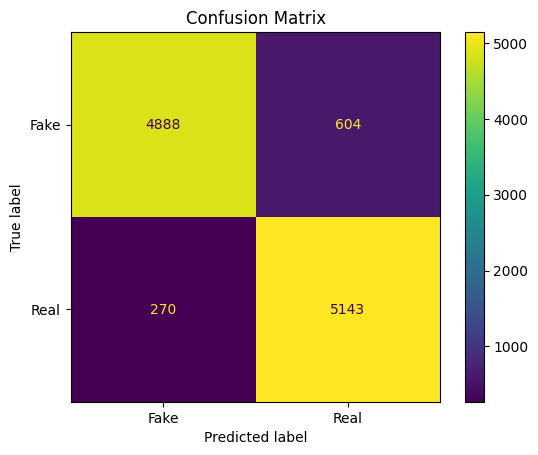

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(true_labels, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

In [11]:
from sklearn.metrics import classification_report

# Print classification report
print("\nClassification Report:")
print(classification_report(true_labels, predictions, target_names=class_labels))


Classification Report:
              precision    recall  f1-score   support

        Fake       0.95      0.89      0.92      5492
        Real       0.89      0.95      0.92      5413

    accuracy                           0.92     10905
   macro avg       0.92      0.92      0.92     10905
weighted avg       0.92      0.92      0.92     10905



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


C:\Users\HP\AppData\Local\Temp\ipykernel_9056\1263008073.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_label = class_labels[int(model.predict(np.expand_dims(all_images[idx], axis=0)) >= 0.5)]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 606ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━

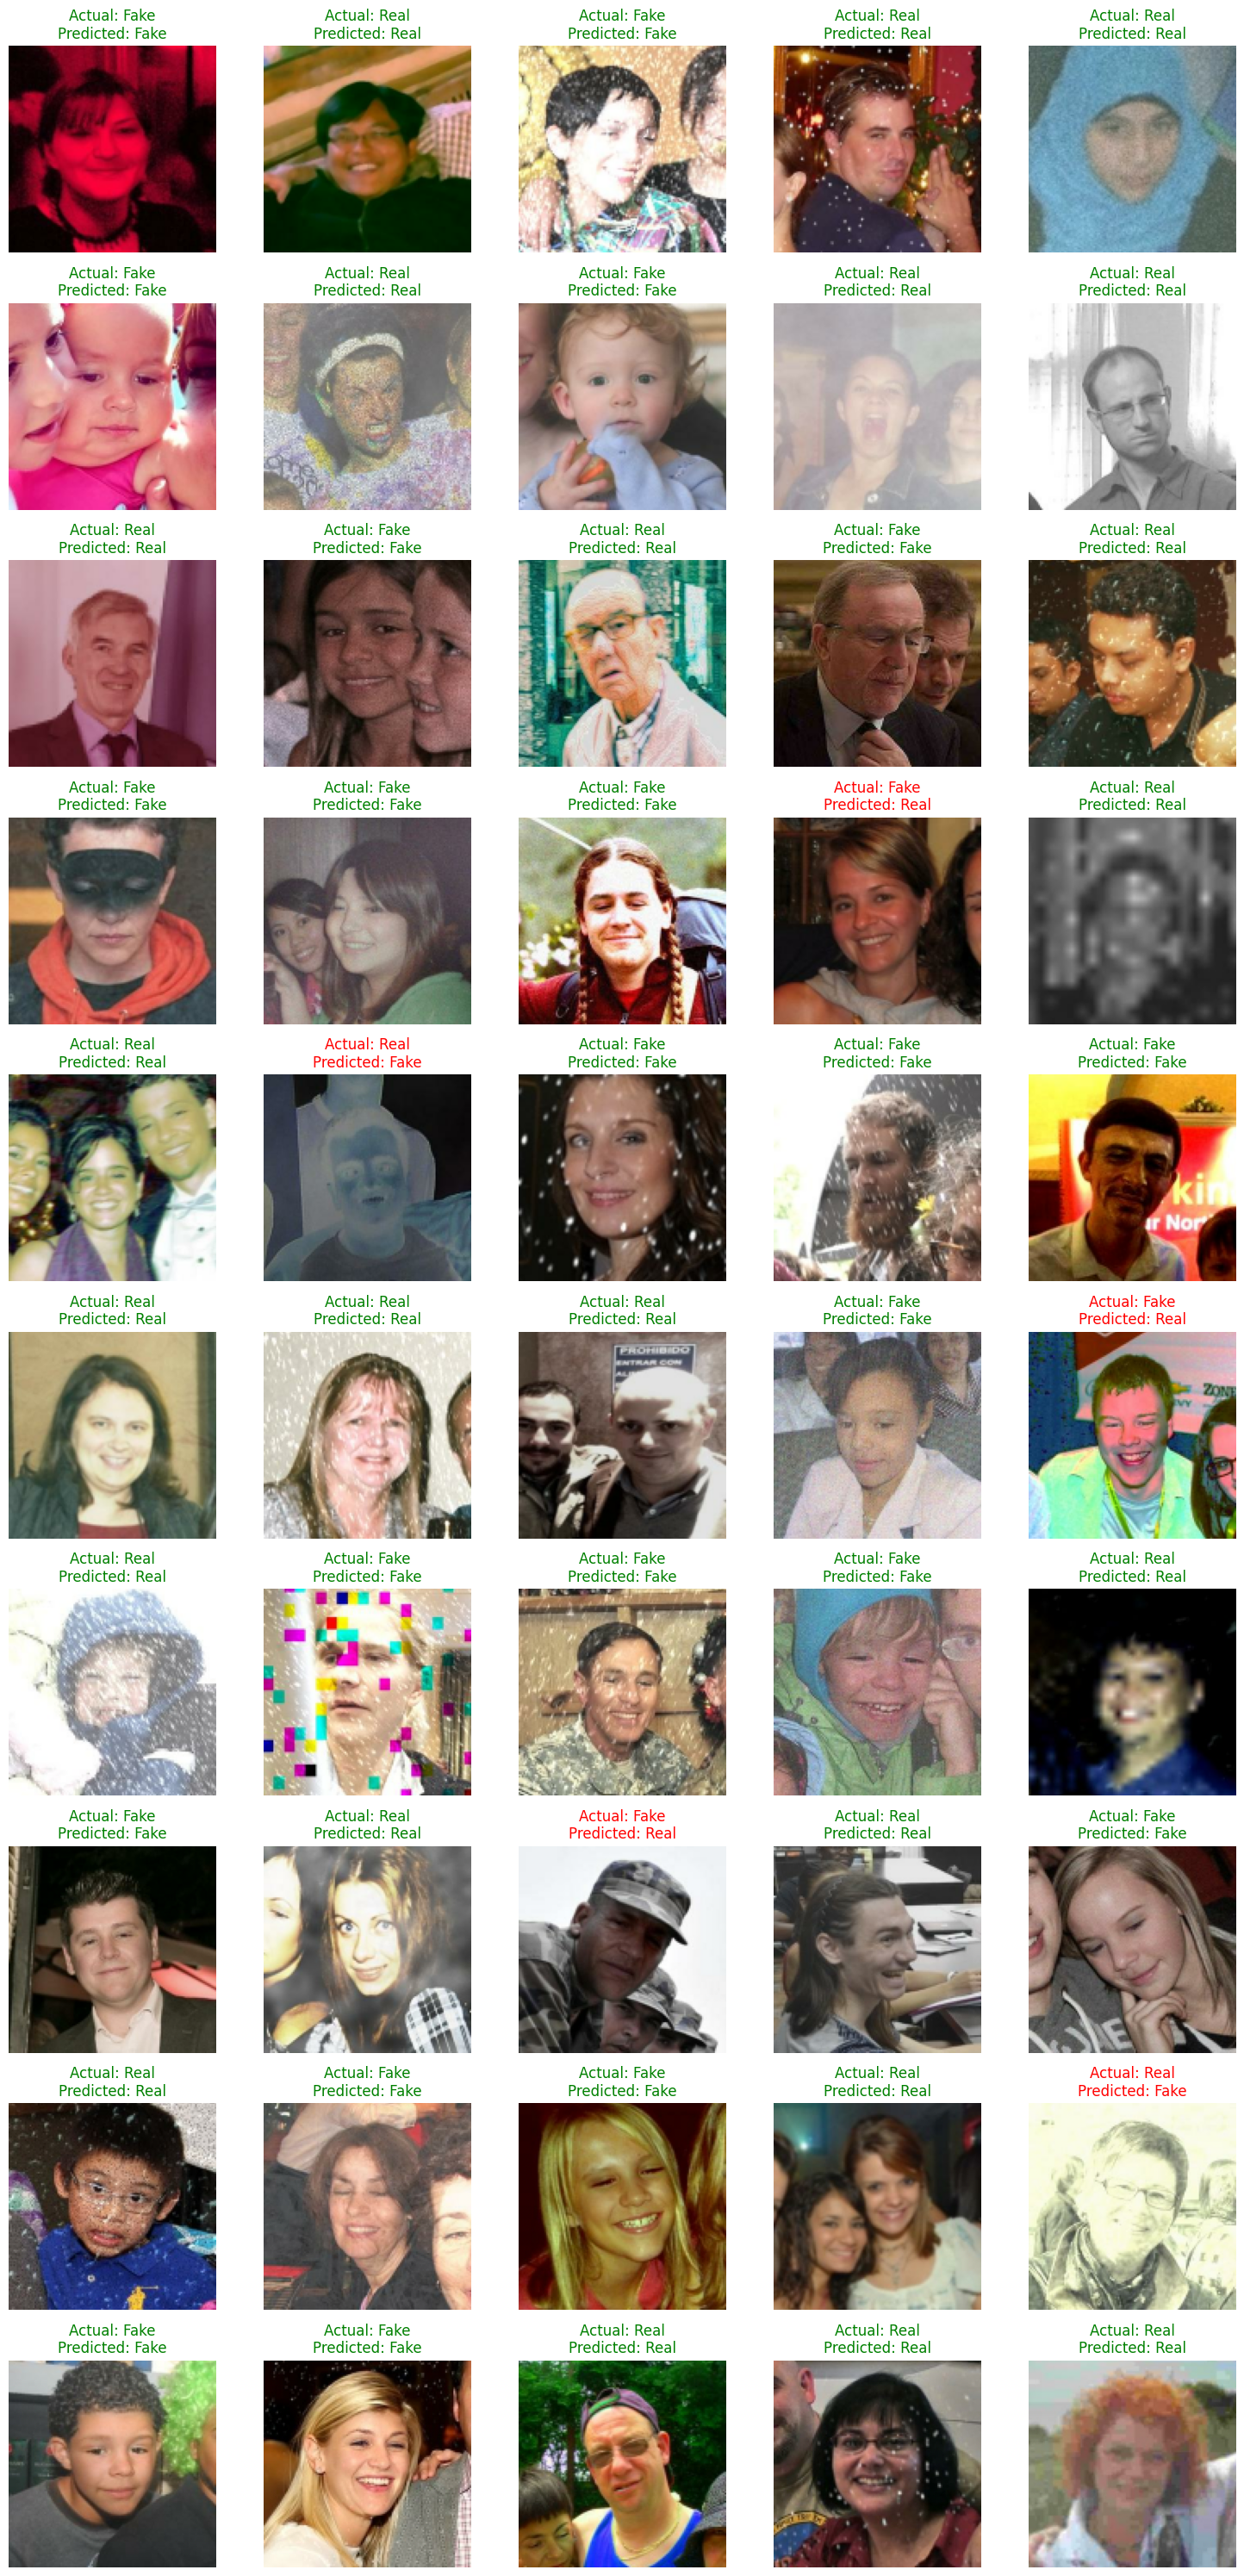

In [10]:
import random
import matplotlib.pyplot as plt
import numpy as np

# Function to display random images with actual and predicted labels
def display_random_test_images(model, dataset, class_labels, num_images=50):
    all_images = []
    all_labels = []
    
    # Collect all images and labels from the dataset
    for images, labels in dataset:
        all_images.extend(images.numpy())
        all_labels.extend(labels.numpy())
    
    # Randomly select indices to display
    random_indices = random.sample(range(len(all_images)), num_images)
    
    # Calculate rows and columns for the plot grid
    rows = int(np.ceil(num_images / 5))  # Adjust the number of columns if needed
    cols = min(5, num_images)  # Limit the number of columns to 5 for better visual fit
    
    # Create a figure with appropriate size
    plt.figure(figsize=(cols * 3, rows * 3))  # Adjust size for better display
    
    for i, idx in enumerate(random_indices):
        plt.subplot(rows, cols, i + 1)  # Arrange in the calculated rows and columns
        plt.imshow(all_images[idx].astype("uint8"))
        
        # Get actual and predicted labels
        actual_label = class_labels[int(all_labels[idx])]
        predicted_label = class_labels[int(model.predict(np.expand_dims(all_images[idx], axis=0)) >= 0.5)]
        
        # Display labels and color-code by accuracy
        plt.title(f'Actual: {actual_label}\nPredicted: {predicted_label}', 
                  color='green' if actual_label == predicted_label else 'red')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Call the function to display images, e.g., 50 random images
display_random_test_images(model, test_dataset, class_labels, num_images=50)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


C:\Users\HP\AppData\Local\Temp\ipykernel_1748\3376861435.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_label = class_labels[int(prediction >= 0.5)]


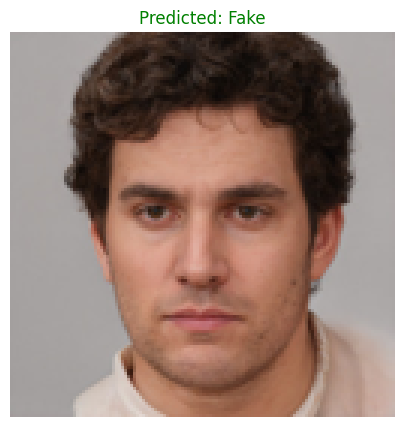

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Function to preprocess a single image for prediction
def preprocess_image(image_path, target_size=(128, 128)):
    # Load the image using PIL
    img = Image.open(image_path).convert('RGB')
    img = img.resize(target_size)
    
    # Convert the image to a numpy array
    img_array = np.array(img)
    img_array = img_array.astype('float32') / 255.0  # Normalize pixel values to [0, 1]
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension (1, height, width, channels)
    return img_array

# Function to display and predict a single image
def display_single_test_image(model, image_path, class_labels):
    # Preprocess the image
    img_array = preprocess_image(image_path)
    
    # Get prediction from the model
    prediction = model.predict(img_array)
    
    # Convert prediction to class label (assuming binary classification)
    predicted_label = class_labels[int(prediction >= 0.5)]
    
    # Display the image with predicted label
    plt.figure(figsize=(5, 5))
    plt.imshow(img_array[0])  # img_array[0] is in [0, 1] range
    plt.title(f'Predicted: {predicted_label}', color='green')
    plt.axis('off')
    plt.show()

# Example usage
image_path = 'test1.jpg'  # Replace with your image path
display_single_test_image(model, image_path, class_labels)